In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:\\Users\\adilv\\Downloads\\diamonds_new (1).csv')
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [ ]:
#carat is the weight of Diamond,cut is the cut quality,table is the width of the Diamond's Table 
# and x,y,z are the length,width and thickness of the Diamond in mm respectively.

In [ ]:
# Target variable-price_new

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [4]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [ ]:
# Checking whether the data types shown as object are really objects

In [6]:
data[['carat', 'cut', 'color']]

,carat,cut,color
0,0.23,Ideal,E
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I
4,0.31,Good,J
...,...,...,...
53935,0.72,Ideal,D
53936,0.72,Good,D
53937,0.70,Very Good,D
53938,0.86,Premium,H


In [ ]:
# Checking and Filling Missing values

In [7]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [8]:
for i in['carat','table']:
    data[i]=data[i].fillna(data[i].median())

In [9]:
data['color']=data['color'].fillna(data['color'].mode()[0])

In [10]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [11]:
data.shape

(53940, 9)

In [12]:
data.describe()

,carat,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,57.457184,5.731157,5.734526,3.539635,1966.399861
std,0.474011,2.234491,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [ ]:
# Given that the min value of x,y and z = 0. A diamond with zero length,width and thickness is not possible.
# So it is an error. Those are not missing values since they are not given as NaN

In [ ]:
# Finding the rows (indices) with either x,y or z as zero values and dropping them

In [13]:
data[(data['x']==0)|(data['y']==0)|(data['z']==0)]

,carat,cut,color,clarity,table,x,y,z,price_new
11182,1.07,Ideal,F,SI2,56.0,0.0,6.62,0.0,2477.0
11963,1.00,Very Good,H,VS2,53.0,0.0,0.00,0.0,2569.5
15951,1.14,Fair,G,VS1,67.0,0.0,0.00,0.0,3190.5
24520,1.56,Ideal,G,VS2,54.0,0.0,0.00,0.0,6400.0
26243,1.20,Premium,D,VVS1,59.0,0.0,0.00,0.0,7843.0
27429,2.25,Premium,H,SI2,59.0,0.0,0.00,0.0,9017.0
49556,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0
49557,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0


In [14]:
zero_index=data[(data['x']==0)|(data['y']==0)|(data['z']==0)].index
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [15]:
data1=data.drop(zero_index)

In [16]:
data1

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [17]:
data1.shape 

(53932, 9)

In [18]:
data1.describe()

,carat,table,x,y,z,price_new
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.00000,53932.000000
mean,0.797879,57.457029,5.732007,5.735254,3.54016,1966.068039
std,0.473986,2.234064,1.119670,1.140343,0.70260,1994.367418
min,0.200000,43.000000,3.730000,3.680000,1.07000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.91000,474.875000
50%,0.700000,57.000000,5.700000,5.710000,3.53000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.04000,2662.000000
max,5.010000,95.000000,10.740000,58.900000,31.80000,9411.500000


In [ ]:
# Finding Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

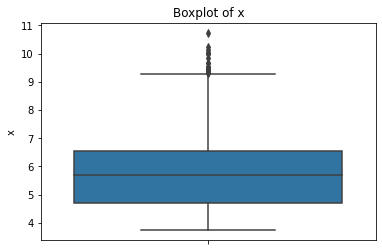

In [19]:
sns.boxplot(y=data1['x'])
plt.title('Boxplot of x')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

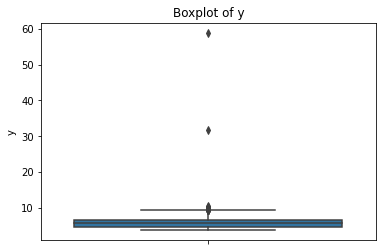

In [20]:
sns.boxplot(y=data1['y'])
plt.title('Boxplot of y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

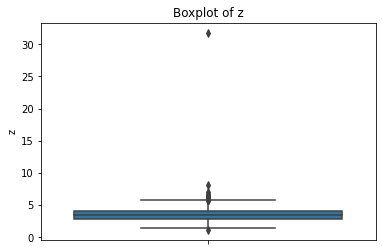

In [21]:
sns.boxplot(y=data1['z'])
plt.title('Boxplot of z')
plt.show

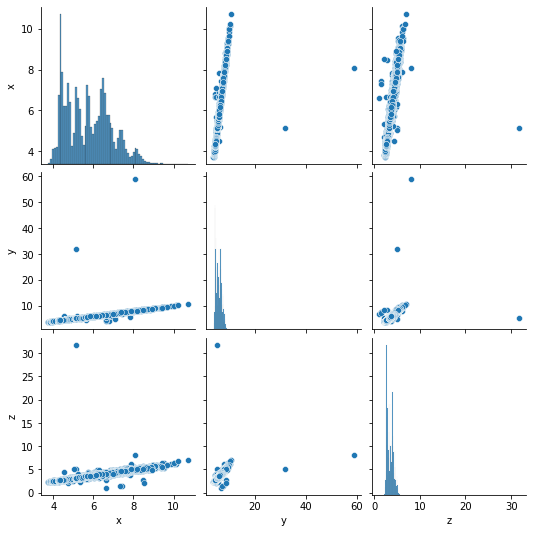

In [22]:
sns.pairplot(data1[['x','y','z']])
plt.show()

In [ ]:
# From the pairplot,we can see that in x vs z,outlier > 30, in y vs z also > 30,in x vs y outliers > 30. 
# From data1.describe, max of y = 58.9 and max of z = 31.8 .These are outliers since a diamond with 10.74mm length,
# 58.9mm width and 31.8mm thickness is not possible.So we can drop those indices greater than 30

In [23]:
data1[data['y']>30].index

C:\Users\adilv\AppData\Local\Temp\ipykernel_5768\2980282049.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1[data['y']>30].index


Int64Index([24067, 49189], dtype='int64')

In [24]:
data1[data['z']>30].index

C:\Users\adilv\AppData\Local\Temp\ipykernel_5768\727489002.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1[data['z']>30].index


Int64Index([48410], dtype='int64')

In [25]:
data2=data1.drop([24067, 49189,48410])

In [26]:
data2.describe()

,carat,table,x,y,z,price_new
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,57.457134,5.731986,5.733796,3.539523,1966.026702
std,0.473967,2.234069,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


In [27]:
data2['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
data2['cut'].nunique()

5

In [29]:
data2['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [30]:
data2['cut'].nunique()

5

In [31]:
data2['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [32]:
data2['cut'].nunique()

5

In [33]:
data2.replace({'cut':{'Fair':5,'Very Good':3,'Good':4,'Premium':2,'Ideal':1}},inplace=True)

In [34]:
data2.replace({'clarity':{'SI2':2, 'SI1':3, 'VS1':5, 'VS2':4, 'VVS2':6, 'VVS1':7, 'I1':1, 'IF':8}},inplace=True)

In [35]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,1,E,2,55.0,3.95,3.98,2.43,163.0
1,0.21,2,E,3,61.0,3.89,3.84,2.31,163.0
2,0.23,4,E,5,65.0,4.05,4.07,2.31,163.5
3,0.29,2,I,4,58.0,4.20,4.23,2.63,167.0
4,0.31,4,J,2,58.0,4.34,4.35,2.75,167.5


In [162]:
# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
lab_enc=LabelEncoder()

In [38]:
data2['color']=lab_enc.fit_transform(data2['color'])

In [39]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,1,1,2,55.0,3.95,3.98,2.43,163.0
1,0.21,2,1,3,61.0,3.89,3.84,2.31,163.0
2,0.23,4,1,5,65.0,4.05,4.07,2.31,163.5
3,0.29,2,5,4,58.0,4.20,4.23,2.63,167.0
4,0.31,4,6,2,58.0,4.34,4.35,2.75,167.5


In [ ]:
# Creating Machine Learning Model

In [64]:
x=data2.drop('price_new',axis=1)
y=data2['price_new']

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [170]:
# Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [69]:
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
print('Mean Squared Error is:',mean_squared_error(y_test,predictions))
print('R Squared value is: ',r2_score(y_test,predictions))

Mean Squared Error is: 360389.82161024836
R Squared value is:  0.9085909912837542


# Min Max Scaling

In [71]:
x

,carat,cut,color,clarity,table,x,y,z
0,0.23,1,1,2,55.0,3.95,3.98,2.43
1,0.21,2,1,3,61.0,3.89,3.84,2.31
2,0.23,4,1,5,65.0,4.05,4.07,2.31
3,0.29,2,5,4,58.0,4.20,4.23,2.63
4,0.31,4,6,2,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,1,0,3,57.0,5.75,5.76,3.50
53936,0.72,4,0,3,55.0,5.69,5.75,3.61
53937,0.70,3,0,3,60.0,5.66,5.68,3.56
53938,0.86,2,4,2,58.0,6.15,6.12,3.74


In [72]:
y

0         163.0
1         163.0
2         163.5
3         167.0
4         167.5
          ...  
53935    1378.5
53936    1378.5
53937    1378.5
53938    1378.5
53939    1378.5
Name: price_new, Length: 53929, dtype: float64

In [73]:
x1=x.drop(['color'],axis=1)

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [76]:
x1=min_max_scaler.fit_transform(x1)

In [77]:
x1.shape

(53929, 7)

In [78]:
 type(x1)

numpy.ndarray

In [79]:
x1=pd.DataFrame(x1,columns=['carat','cut','clarity','table','x','y','z'])

In [80]:
x1.describe()

,carat,cut,clarity,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.124297,0.273953,0.435872,0.278022,0.285590,0.299387,0.417855
std,0.098538,0.279135,0.235303,0.042963,0.159722,0.162026,0.117038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.000000,0.285714,0.250000,0.139800,0.151603,0.311337
50%,0.103950,0.250000,0.428571,0.269231,0.281027,0.295918,0.416244
75%,0.174636,0.500000,0.571429,0.307692,0.400856,0.416910,0.502538
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
x.drop(['carat','cut','clarity','table','x','y','z'],axis=1,inplace=True)

In [82]:
x

,color
0,1
1,1
2,1
3,5
4,6
...,...
53935,0
53936,0
53937,0
53938,4


In [83]:
x1

,carat,cut,clarity,table,x,y,z
0,0.006237,0.00,0.142857,0.230769,0.031384,0.043732,0.230118
1,0.002079,0.25,0.285714,0.346154,0.022825,0.023324,0.209814
2,0.006237,0.75,0.571429,0.423077,0.045649,0.056851,0.209814
3,0.018711,0.25,0.428571,0.288462,0.067047,0.080175,0.263959
4,0.022869,0.75,0.142857,0.288462,0.087019,0.097668,0.284264
...,...,...,...,...,...,...,...
53924,0.108108,0.00,0.285714,0.269231,0.288160,0.303207,0.411168
53925,0.108108,0.75,0.285714,0.230769,0.279601,0.301749,0.429780
53926,0.103950,0.50,0.285714,0.326923,0.275321,0.291545,0.421320
53927,0.137214,0.25,0.142857,0.288462,0.345221,0.355685,0.451777


In [84]:
x.reset_index(drop=True, inplace=True)
x1.reset_index(drop=True, inplace=True)

In [85]:
x=pd.concat([x,x1],axis=1)

In [86]:
x

,color,carat,cut,clarity,table,x,y,z
0,1,0.006237,0.00,0.142857,0.230769,0.031384,0.043732,0.230118
1,1,0.002079,0.25,0.285714,0.346154,0.022825,0.023324,0.209814
2,1,0.006237,0.75,0.571429,0.423077,0.045649,0.056851,0.209814
3,5,0.018711,0.25,0.428571,0.288462,0.067047,0.080175,0.263959
4,6,0.022869,0.75,0.142857,0.288462,0.087019,0.097668,0.284264
...,...,...,...,...,...,...,...,...
53924,0,0.108108,0.00,0.285714,0.269231,0.288160,0.303207,0.411168
53925,0,0.108108,0.75,0.285714,0.230769,0.279601,0.301749,0.429780
53926,0,0.103950,0.50,0.285714,0.326923,0.275321,0.291545,0.421320
53927,4,0.137214,0.25,0.142857,0.288462,0.345221,0.355685,0.451777


In [ ]:
# Creating Machine Learning Models

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [88]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [89]:
print('Mean Squared Error is:',mean_squared_error(y_test,predictions))
print('R Squared value is: ',r2_score(y_test,predictions))

Mean Squared Error is: 360389.82161024836
R Squared value is:  0.9085909912837542


In [ ]:
# From this Mean Squared Error and R Squared value after Scaling,we can see that MinMax Scaling doesn't affect this data.

# Standard Scaling

In [90]:
x=data2.drop('price_new',axis=1)
y=data2['price_new']

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
std_scl=StandardScaler()

In [93]:
x1=x.drop(['color'],axis=1)

In [94]:
x1

,carat,cut,clarity,table,x,y,z
0,0.23,1,2,55.0,3.95,3.98,2.43
1,0.21,2,3,61.0,3.89,3.84,2.31
2,0.23,4,5,65.0,4.05,4.07,2.31
3,0.29,2,4,58.0,4.20,4.23,2.63
4,0.31,4,2,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,1,3,57.0,5.75,5.76,3.50
53936,0.72,4,3,55.0,5.69,5.75,3.61
53937,0.70,3,3,60.0,5.66,5.68,3.56
53938,0.86,2,2,58.0,6.15,6.12,3.74


In [95]:
 x1=std_scl.fit_transform(x1)

In [96]:
type(x1)

numpy.ndarray

In [97]:
x1=pd.DataFrame(x1,columns=['carat','cut','clarity','table','x','y','z'])

In [98]:
x1

,carat,cut,clarity,table,x,y,z
0,-1.198127,-0.981444,-1.245277,-1.099857,-1.591572,-1.577876,-1.604082
1,-1.240324,-0.085812,-0.638152,1.585850,-1.645161,-1.703833,-1.777571
2,-1.198127,1.705453,0.576099,3.376322,-1.502258,-1.496904,-1.777571
3,-1.071534,-0.085812,-0.031027,0.242996,-1.368286,-1.352953,-1.314934
4,-1.029337,1.705453,-1.245277,0.242996,-1.243245,-1.244990,-1.141445
...,...,...,...,...,...,...,...
53924,-0.164291,-0.981444,-0.638152,-0.204622,0.016089,0.023576,-0.057140
53925,-0.164291,1.705453,-0.638152,-1.099857,-0.037499,0.014579,0.101892
53926,-0.206488,0.809821,-0.638152,1.138232,-0.064294,-0.048399,0.029605
53927,0.131091,-0.085812,-1.245277,0.242996,0.373347,0.347465,0.289838


In [99]:
x1.describe()

,carat,cut,clarity,table,x,y,z
count,5.392900e+04,5.392900e+04,5.392900e+04,5.392900e+04,5.392900e+04,5.392900e+04,5.392900e+04
mean,-2.430631e-14,6.241694e-14,2.106715e-14,-1.364018e-14,3.558237e-15,-1.956455e-15,-7.803408e-14
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261423e+00,-9.814440e-01,-1.852403e+00,-6.471273e+00,-1.788064e+00,-1.847784e+00,-3.570290e+00
25%,-8.394488e-01,-9.814440e-01,-6.381521e-01,-6.522395e-01,-9.127817e-01,-9.121040e-01,-9.101268e-01
50%,-2.064881e-01,-8.581158e-02,-3.102668e-02,-2.046215e-01,-2.856793e-02,-2.140867e-02,-1.376737e-02
75%,5.108673e-01,8.098208e-01,5.760987e-01,6.906143e-01,7.216741e-01,7.253359e-01,7.235605e-01
max,8.887047e+00,2.601086e+00,2.397475e+00,1.680486e+01,4.472884e+00,4.324105e+00,4.974039e+00


In [100]:
x.drop(['carat','cut','clarity','table','x','y','z'],axis=1,inplace=True)

In [101]:
x.reset_index(drop=True, inplace=True)
x1.reset_index(drop=True, inplace=True)

In [102]:
x=pd.concat([x,x1],axis=1)

In [103]:
x

,color,carat,cut,clarity,table,x,y,z
0,1,-1.198127,-0.981444,-1.245277,-1.099857,-1.591572,-1.577876,-1.604082
1,1,-1.240324,-0.085812,-0.638152,1.585850,-1.645161,-1.703833,-1.777571
2,1,-1.198127,1.705453,0.576099,3.376322,-1.502258,-1.496904,-1.777571
3,5,-1.071534,-0.085812,-0.031027,0.242996,-1.368286,-1.352953,-1.314934
4,6,-1.029337,1.705453,-1.245277,0.242996,-1.243245,-1.244990,-1.141445
...,...,...,...,...,...,...,...,...
53924,0,-0.164291,-0.981444,-0.638152,-0.204622,0.016089,0.023576,-0.057140
53925,0,-0.164291,1.705453,-0.638152,-1.099857,-0.037499,0.014579,0.101892
53926,0,-0.206488,0.809821,-0.638152,1.138232,-0.064294,-0.048399,0.029605
53927,4,0.131091,-0.085812,-1.245277,0.242996,0.373347,0.347465,0.289838


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [105]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [106]:
print('Mean Squared Error is:',mean_squared_error(y_test,predictions))
print('R Squared value is: ',r2_score(y_test,predictions))

Mean Squared Error is: 360389.82161024836
R Squared value is:  0.9085909912837542


In [ ]:
# From this Mean Squared Error and R Squared value after Scaling,we can see that Std Scaling doesn't affect this data.

# Normalization

In [107]:
x=data2.drop('price_new',axis=1)
y=data2['price_new']

In [108]:
x1=x.drop(['color'],axis=1)

In [109]:
from sklearn import preprocessing

In [110]:
x1=preprocessing.normalize(x1)

In [111]:
x1

array([[0.00415281, 0.01805572, 0.03611143, ..., 0.07132008, 0.07186175,
        0.04387539],
       [0.00342051, 0.03257632, 0.04886449, ..., 0.06336095, 0.06254654,
        0.03762565],
       [0.00350569, 0.06096855, 0.07621069, ..., 0.06173066, 0.0620355 ,
        0.03520934],
       ...,
       [0.01151499, 0.04934997, 0.04934997, ..., 0.09310695, 0.09343595,
        0.05856197],
       [0.01461621, 0.03399118, 0.03399118, ..., 0.10452287, 0.104013  ,
        0.0635635 ],
       [0.01344384, 0.01792513, 0.03585025, ..., 0.10450348, 0.10522049,
        0.06524746]])

In [112]:
x1=pd.DataFrame(x1,columns=['carat','cut','clarity','table','x','y','z'])

In [113]:
x1

,carat,cut,clarity,table,x,y,z
0,0.004153,0.018056,0.036111,0.993064,0.071320,0.071862,0.043875
1,0.003421,0.032576,0.048864,0.993578,0.063361,0.062547,0.037626
2,0.003506,0.060969,0.076211,0.990739,0.061731,0.062036,0.035209
3,0.004954,0.034167,0.068333,0.990833,0.071750,0.072262,0.044929
4,0.005294,0.068305,0.034152,0.990416,0.074110,0.074281,0.046959
...,...,...,...,...,...,...,...
53924,0.012462,0.017308,0.051925,0.986577,0.099523,0.099696,0.060579
53925,0.012872,0.071509,0.053631,0.983243,0.101721,0.102794,0.064536
53926,0.011515,0.049350,0.049350,0.986999,0.093107,0.093436,0.058562
53927,0.014616,0.033991,0.033991,0.985744,0.104523,0.104013,0.063564


In [114]:
x.drop(['carat','cut','clarity','table','x','y','z'],axis=1,inplace=True)

In [115]:
x.reset_index(drop=True, inplace=True)
x1.reset_index(drop=True, inplace=True)

In [116]:
x=pd.concat([x,x1],axis=1)

In [117]:
x

,color,carat,cut,clarity,table,x,y,z
0,1,0.004153,0.018056,0.036111,0.993064,0.071320,0.071862,0.043875
1,1,0.003421,0.032576,0.048864,0.993578,0.063361,0.062547,0.037626
2,1,0.003506,0.060969,0.076211,0.990739,0.061731,0.062036,0.035209
3,5,0.004954,0.034167,0.068333,0.990833,0.071750,0.072262,0.044929
4,6,0.005294,0.068305,0.034152,0.990416,0.074110,0.074281,0.046959
...,...,...,...,...,...,...,...,...
53924,0,0.012462,0.017308,0.051925,0.986577,0.099523,0.099696,0.060579
53925,0,0.012872,0.071509,0.053631,0.983243,0.101721,0.102794,0.064536
53926,0,0.011515,0.049350,0.049350,0.986999,0.093107,0.093436,0.058562
53927,4,0.014616,0.033991,0.033991,0.985744,0.104523,0.104013,0.063564


In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [119]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [120]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,predictions))
print('R Squared value is : ',r2_score(y_test,predictions))

MSE is :  339041.84500102117
R Squared value is :  0.9140056763357018


In [ ]:
# MSE after Normalization is less than MSE after scaling.

In [ ]:
# Correlation

<AxesSubplot:>

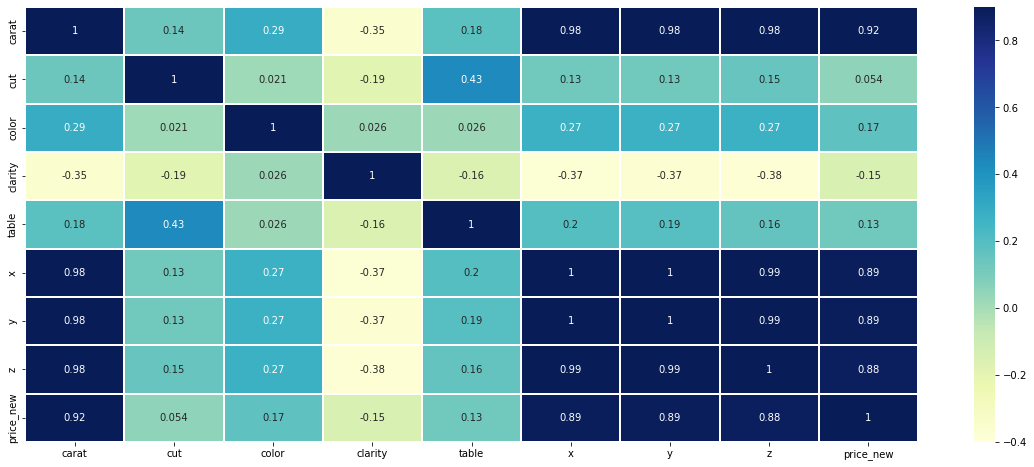

In [121]:
corrmatrix=data2.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.4,vmax=0.9,linewidth=0.2,cmap='YlGnBu')